In [2]:
import numpy as np
import matplotlib.pyplot as plt

Strain OK


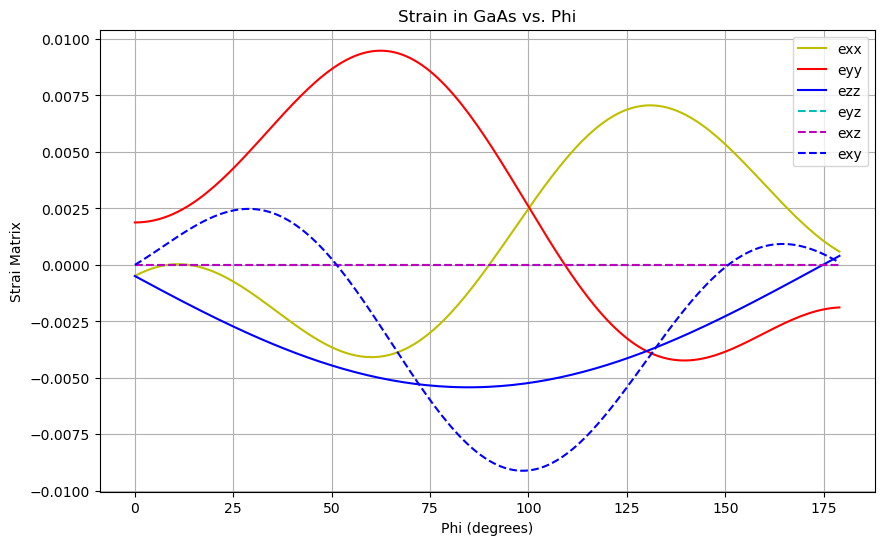

In [3]:
# strain tensors calculation from derived matrix
def matrix_strain(phi):
    phi = np.radians(phi)
    Ey1 = -1E-12 * 12.6*1E7 #(1*1E7 v/m)

    e_xx = Ey1 * (30.38 * np.cos(phi) - 26.47 * np.cos(3 * phi) - 10.70 * np.sin(phi) - 10.70 * np.sin(3 * phi))
    e_yy = Ey1 * (-41.38 * np.cos(phi) + 26.47 * np.cos(3 * phi) - 32.11 * np.sin(phi) + 10.70 * np.sin(3 * phi))
    e_zz = Ey1 * (3.91 * np.cos(phi) + 42.81 * np.sin(phi))
    e_yz = 0.0
    e_xz = 0.0
    e_xy = Ey1 * np.sin(phi) * (10.37 - 58.38 * np.cos(2 * phi) - 47.20 * np.cos(phi) * np.sin(phi))
    
    return [e_xx, e_yy, e_zz, e_yz, e_xz, e_xy]


phi_values = np.arange(0, 180, 1)
matrix_values = [] 


for phi in phi_values:
    matrix_values.append(matrix_strain(phi))

matrix_values = np.array(matrix_values)


with open('GaAsStrainfromLNStress_Calculation.dat', 'w') as file:
    file.write("phi, e_xx, e_yy, e_zz, e_yz, e_xz, e_xy\n")
    
    for phi, values in zip(phi_values, matrix_values):
        file.write(f"{phi}, " + ", ".join(map(str, values)) + "\n")

print("Strain OK")


plt.figure(figsize=(10, 6))
plt.plot(phi_values, matrix_values[:, 0], label='exx', color='y')
plt.plot(phi_values, matrix_values[:, 1], label='eyy', color='r')
plt.plot(phi_values, matrix_values[:, 2], label='ezz', color='b')
plt.plot(phi_values, matrix_values[:, 3], label='eyz', color='c', linestyle='--')
plt.plot(phi_values, matrix_values[:, 4], label='exz', color='m', linestyle='--')
plt.plot(phi_values, matrix_values[:, 5], label='exy', color='b', linestyle='--')

plt.title('Strain in GaAs vs. Phi')
plt.xlabel('Phi (degrees)')
plt.ylabel('Strai Matrix')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()